# cadCAD Experiment


In [1]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments

# from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

time: 703 ms (started: 2021-09-15 16:00:49 -04:00)


In [2]:
from model import run

hi mom!
stakeDelegateds
605
stakeDelegatedLockeds
375
stakeDelegatedWithdrawns
326
allocationCloseds
47
allocationCollecteds
16
stakeDepositeds
25
rewardsAssigneds
47
running file: sim_setup.py
end of file: sim_setup.py
time: 2.11 s (started: 2021-09-15 16:00:49 -04:00)


In [3]:
df = run.run()
import pickle
with open('experiment.p', 'wb') as f:
    pickle.dump(df, f)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (300, 26, 1, 11)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
timestep=1 beginning...
timestep=2 beginning...
ACTION: DELEGATE (before)--
                delegator_id='0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea', 
                pool_delegated_stake=Decimal('0'),
                delegation_tokens_quantity=Decimal('165851.137200000000000000'),
                shares=0,
                delegator.holdings=Decimal('10000000000'), 
                delegator.undelegated_tokens=0, 
                delegator.shares=0
<class 'decimal.Decimal'>
<class 'decimal.Decimal'>
  (after)--
              

In [4]:
df

,id_indexer,pool_delegated_stake,pool_locked_stake,shares,delegators,GRT,cumulative_indexing_revenue,cumulative_query_revenue,cumulative_non_indexer_revenue,cumulative_deposited_stake,initial_stake_deposited,simulation,subset,run,substep,timestep
0,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,0,0
1,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,1,1
2,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,2,1
3,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,3,1
4,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,indexer,11089364.81871694035799944874,0,11032956.76607215491801547731,"{'indexer': self.id='indexer', self.shares=0, ...",373387.589610535022429190,373387.589610535022429190,0,41072.63485715884749268891087,9615385.000000000000000000,True,0,0,1,2,300
1797,indexer,11089364.81871694035799944874,0,11032956.76607215491801547731,"{'indexer': self.id='indexer', self.shares=0, ...",373387.589610535022429190,373387.589610535022429190,0,41072.63485715884749268891087,9615385.000000000000000000,True,0,0,1,3,300
1798,indexer,11089364.81871694035799944874,0,11032956.76607215491801547731,"{'indexer': self.id='indexer', self.shares=0, ...",373387.589610535022429190,373387.589610535022429190,0,41072.63485715884749268891087,9615385.000000000000000000,True,0,0,1,4,300
1799,indexer,11089364.81871694035799944874,0,11032956.76607215491801547731,"{'indexer': self.id='indexer', self.shares=0, ...",373387.589610535022429190,373387.589610535022429190,0,41072.63485715884749268891087,9615385.000000000000000000,True,0,0,1,5,300


time: 94 ms (started: 2021-09-15 16:00:55 -04:00)


# Revenue coming in each period.  
## Indexing rewards and query rewards come in as an event stream.

<AxesSubplot:>

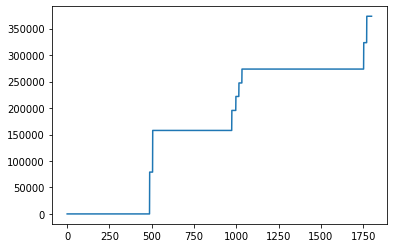

time: 313 ms (started: 2021-09-15 16:00:55 -04:00)


In [5]:
df.GRT.astype(float).plot()

<AxesSubplot:>

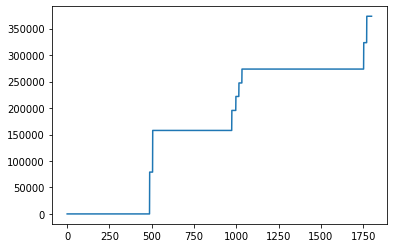

time: 156 ms (started: 2021-09-15 16:00:55 -04:00)


In [6]:
df.cumulative_indexing_revenue.astype(float).plot()

<AxesSubplot:>

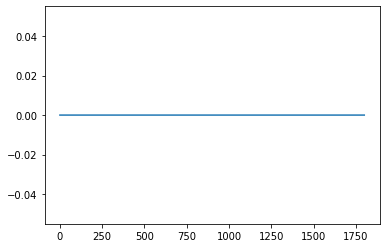

time: 156 ms (started: 2021-09-15 16:00:56 -04:00)


In [7]:
df.cumulative_query_revenue.astype(float).plot()

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each delegator eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [8]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_holdings:
            delegator_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_holdings[delegator_id][timestep] = float(delegator.holdings)
        delegator_shares[delegator_id][timestep] = float(delegator.shares)
    timestep += 1

time: 438 ms (started: 2021-09-15 16:00:56 -04:00)


# Shares broken down by Delegator

In [9]:
# resultset = [value for key, value in your_dict.items() if key not in your_blacklisted_set]

time: 47 ms (started: 2021-09-15 16:00:56 -04:00)


Text(0, 0.5, 'Delegator Shares')

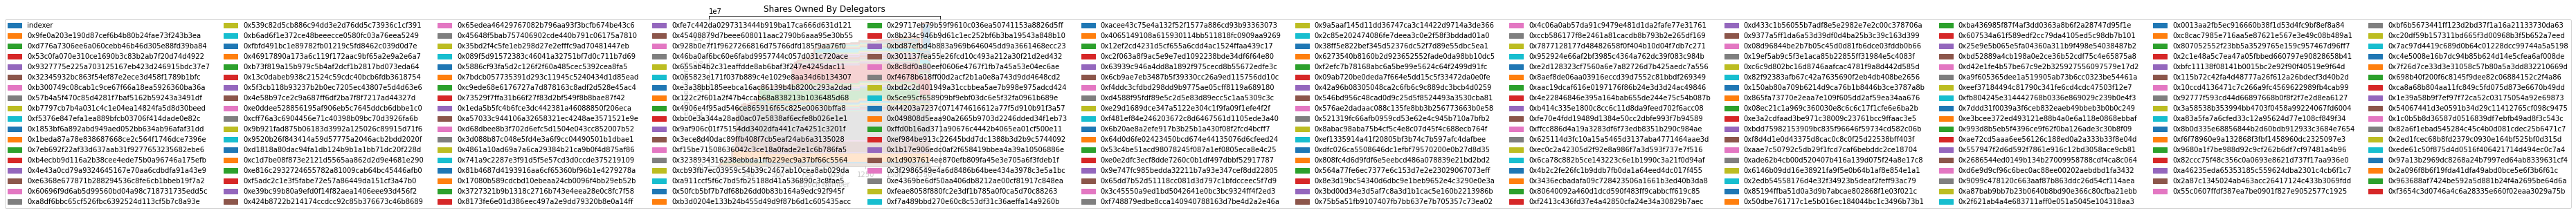

time: 6.41 s (started: 2021-09-15 16:00:56 -04:00)


In [10]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

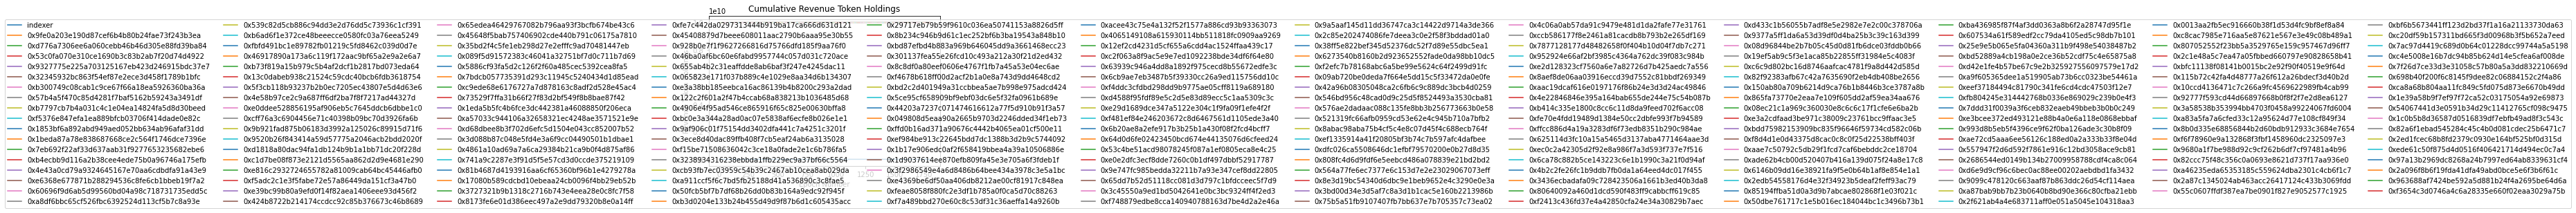

time: 6.08 s (started: 2021-09-15 16:01:03 -04:00)


In [11]:
df_plot = pd.DataFrame(delegator_holdings)
df_plot.plot(kind='line')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [12]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 93 ms (started: 2021-09-15 16:01:09 -04:00)


In [13]:
df['total_shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 110 ms (started: 2021-09-15 16:01:09 -04:00)


In [14]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.total_shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 1.64 s (started: 2021-09-15 16:01:09 -04:00)


In [15]:
shareholder_df

,shareholder,shares,Epoch Number
0,0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea,165851.137200000000000000,9
0,0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea,165851.137200000000000000,10
0,0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea,165851.137200000000000000,11
0,0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea,165851.137200000000000000,12
0,0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea,165851.137200000000000000,13
...,...,...,...
199,0xede61c50f875d4d0516f406421714d494ec0c7a4,19818.20889382313270102926636,1800
200,0x97a13b2969dc8268a24b7997ed64ab8339631cf4,1981820.889382313270102926635,1800
201,0x2a096f8b6f19fda41dfa49abd0bce5e6f3b6f61c,2264.844730595001428206325589,1800
202,0x963688af7424be592a5d881b24f4a2695be64d6a,5656.156454714909719139154679,1800


time: 47 ms (started: 2021-09-15 16:01:11 -04:00)


# Pool Delegated Stake


In [16]:
df.pool_delegated_stake[:20]

0                             0
1                             0
2                             0
3                             0
4                             0
5                             0
6                             0
7                             0
8                             0
9     165851.137200000000000000
10    165851.137200000000000000
11    165851.137200000000000000
12    165851.137200000000000000
13    165851.137200000000000000
14    165851.137200000000000000
15    417670.781850000000000000
16    417670.781850000000000000
17    417670.781850000000000000
18    417670.781850000000000000
19    417670.781850000000000000
Name: pool_delegated_stake, dtype: object

time: 47 ms (started: 2021-09-15 16:01:11 -04:00)


In [17]:
# df['period_revenue_per_share'] = df.period_revenue/df.shares
# df.period_revenue

time: 47 ms (started: 2021-09-15 16:01:11 -04:00)


In [18]:
df

,id_indexer,pool_delegated_stake,pool_locked_stake,shares,delegators,GRT,cumulative_indexing_revenue,cumulative_query_revenue,cumulative_non_indexer_revenue,cumulative_deposited_stake,initial_stake_deposited,simulation,subset,run,substep,timestep,shareholders,total_shares
0,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,0,0,[],[]
1,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,1,1,[],[]
2,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,2,1,[],[]
3,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,3,1,[],[]
4,indexer,0,0,0,"{'indexer': self.id='indexer', self.shares=0}",0,0,0,0,0,False,0,0,1,4,1,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,indexer,11089364.81871694035799944874,0,11032956.76607215491801547731,"{'indexer': self.id='indexer', self.shares=0, ...",373387.589610535022429190,373387.589610535022429190,0,41072.63485715884749268891087,9615385.000000000000000000,True,0,0,1,2,300,"[0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea, 0...","[165851.137200000000000000, 1E-22, 6965.000000..."
1797,indexer,11089364.81871694035799944874,0,11032956.76607215491801547731,"{'indexer': self.id='indexer', self.shares=0, ...",373387.589610535022429190,373387.589610535022429190,0,41072.63485715884749268891087,9615385.000000000000000000,True,0,0,1,3,300,"[0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea, 0...","[165851.137200000000000000, 1E-22, 6965.000000..."
1798,indexer,11089364.81871694035799944874,0,11032956.76607215491801547731,"{'indexer': self.id='indexer', self.shares=0, ...",373387.589610535022429190,373387.589610535022429190,0,41072.63485715884749268891087,9615385.000000000000000000,True,0,0,1,4,300,"[0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea, 0...","[165851.137200000000000000, 1E-22, 6965.000000..."
1799,indexer,11089364.81871694035799944874,0,11032956.76607215491801547731,"{'indexer': self.id='indexer', self.shares=0, ...",373387.589610535022429190,373387.589610535022429190,0,41072.63485715884749268891087,9615385.000000000000000000,True,0,0,1,5,300,"[0x9fe0a203e190d87cef6b4b80b24fae73f243b3ea, 0...","[165851.137200000000000000, 1E-22, 6965.000000..."


time: 63 ms (started: 2021-09-15 16:01:11 -04:00)
